In [118]:
#Immporting Libraries That Will Be Used In The Project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Reading Dataset
df = pd.read_csv('healthcare_dataset.csv')

In [4]:
#printing out first 10 rows of the dataset
df.head(10) 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [5]:
#Prining Shape
df.shape

(10000, 15)

In [6]:
#Printing data types
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [7]:
#Checking Null Count in every feature
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
#date of admisson is an object, we need to convert it to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

#date of discharge is an object, we need to convert it to datetime
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [13]:
#Checking for duplicates
df.duplicated().sum()

0

In [14]:
#Printing Type of Features weather they are ordinal or nominal or categorical
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'labels')

#Checking for unique values in the dataset
df.nunique()



Name : 9378 labels
Age : 68 labels
Gender : 2 labels
Blood Type : 8 labels
Medical Condition : 6 labels
Date of Admission : 1815 labels
Doctor : 9416 labels
Hospital : 8639 labels
Insurance Provider : 5 labels
Billing Amount : 10000 labels
Room Number : 400 labels
Admission Type : 3 labels
Discharge Date : 1834 labels
Medication : 5 labels
Test Results : 3 labels


Name                   9378
Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1815
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Room Number             400
Admission Type            3
Discharge Date         1834
Medication                5
Test Results              3
dtype: int64

In [21]:
#Print blood Type is nominal 
print("Name is Nominal")
print("Age is continous")
print("Gender is Binary")
print("Blood Type is Nominal")
print("Medical Condition is Nominal")
print("Date of Admisson is Continous")
print("Room Number is Continous")
print("Admisson Type is Ordinal")
print("Discharge Date is Continous")
print("Medication is nominal")
print("Test Result is Ordinal")
print ("Hospital is Continous")
print("Inssurance Provider is Continous")
print("Doctor is Nominal")



Name is Nominal
Age is continous
Gender is Binary
Blood Type is Nominal
Medical Condition is Nominal
Date of Admisson is Continous
Room Number is Continous
Admisson Type is Ordinal
Discharge Date is Continous
Medication is nominal
Test Result is Ordinal
Hospital is Continous
Inssurance Provider is Continous
Doctor is Nominal


In [24]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [36]:
#Checking if discharge date in earlier than admission date.
miss_match_dates = df['Discharge Date'] < df['Date of Admission']
df_miss = df[miss_match_dates]
df_miss
miss_match_dates_count = (df['Discharge Date'] < df['Date of Admission']).sum()
print(miss_match_dates_count)

0


In [25]:
#make a new feature in dataset by calculating the number of days a patient stayed in the hospital
df['Duration'] = df['Discharge Date'] - df['Date of Admission']
df['Duration'] = df['Duration'].dt.days
df['Duration']


0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Duration, Length: 10000, dtype: int64

In [26]:
#printing out first 10 rows of the dataset
df.head(10) 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Duration
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,24
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,17
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal,5
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal,1


In [40]:
#Label Encoding for Admisson type

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Admission Type'] = labelencoder.fit_transform(df['Admission Type'])
df['Admission Type']


0       0
1       1
2       1
3       2
4       2
       ..
9995    0
9996    1
9997    0
9998    2
9999    1
Name: Admission Type, Length: 10000, dtype: int32

In [41]:
#printing out first 10 rows of the dataset
df.head(10) 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Duration
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,0,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,1,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,1,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,2,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,2,2021-08-02,Paracetamol,Normal,24
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,2,2020-08-23,Aspirin,Abnormal,3
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,2,2021-04-15,Lipitor,Abnormal,24
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,0,2019-06-02,Aspirin,Normal,17
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,0,2020-12-22,Aspirin,Abnormal,5
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,2,2022-12-16,Aspirin,Normal,1


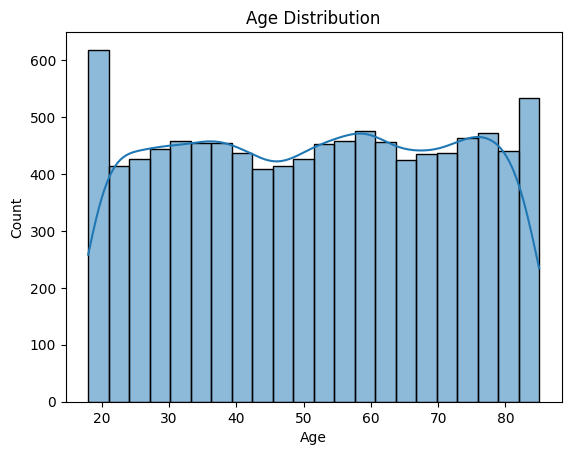

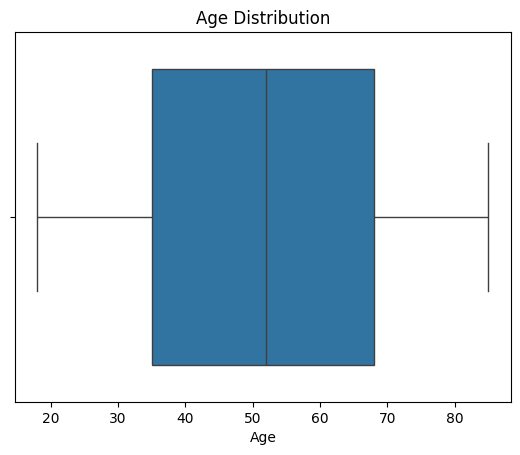

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64

In [46]:
#EDA on Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#data analysis for age
sns.boxplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

#Calculating summary statstics.

age = df['Age']
age.describe()



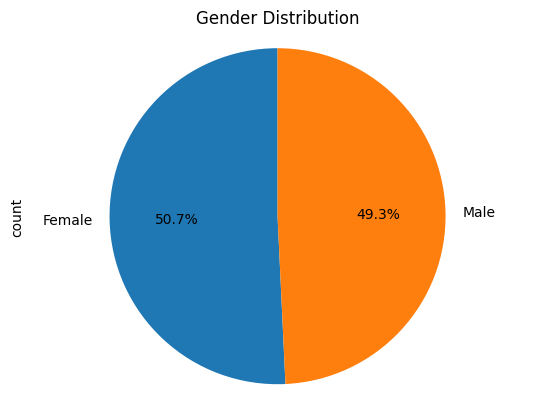

In [49]:
#pie chart on gender distribution
gender_counts = df['Gender'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Gender Distribution")
plt.show()


(-1.0999999757087129, 1.09999993292888, -1.099999906038475, 1.0999999955256416)

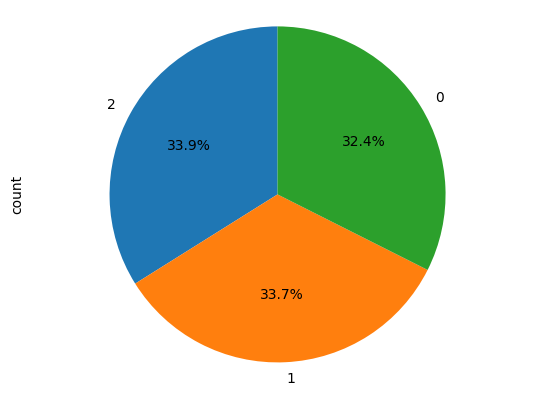

In [53]:
#pie chart on admisson type
#label 0 as elective
#label 1 as emergency
#label 2 as newborn
admission_type_counts = df['Admission Type'].value_counts()
admission_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')



Text(0.5, 1.0, 'Blood Type Distribution')

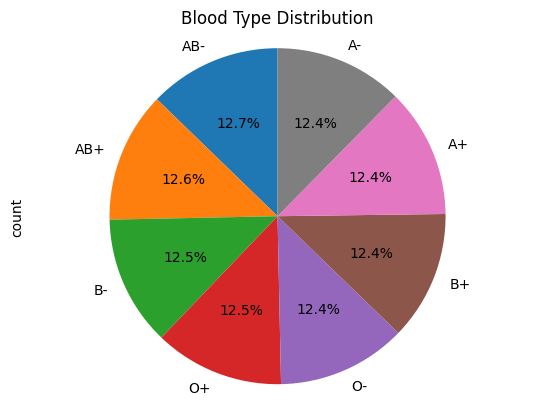

In [59]:
#pie chart on blood type
blood_type_counts = df['Blood Type'].value_counts()
blood_type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Blood Type Distribution")



Text(0.5, 1.0, 'Medical Condition Distribution')

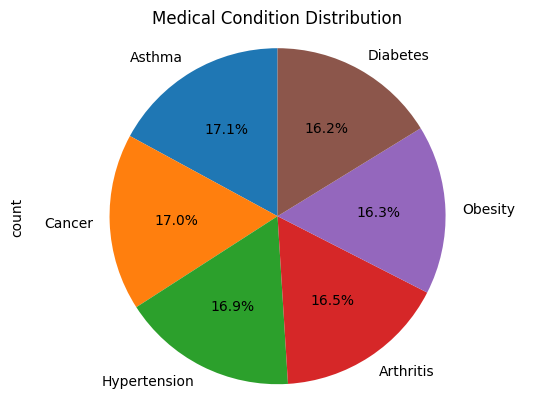

In [62]:
#make pie chart for medical condition
medical_condition_counts = df['Medical Condition'].value_counts()
medical_condition_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Medical Condition Distribution")

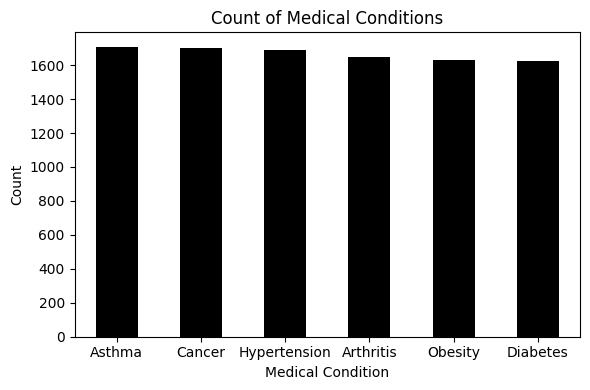

In [64]:
count_medical_conditions = (df['Medical Condition']).value_counts()
plt.figure(figsize=(6, 4))
count_medical_conditions.plot(kind='bar', color='black')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Count of Medical Conditions')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

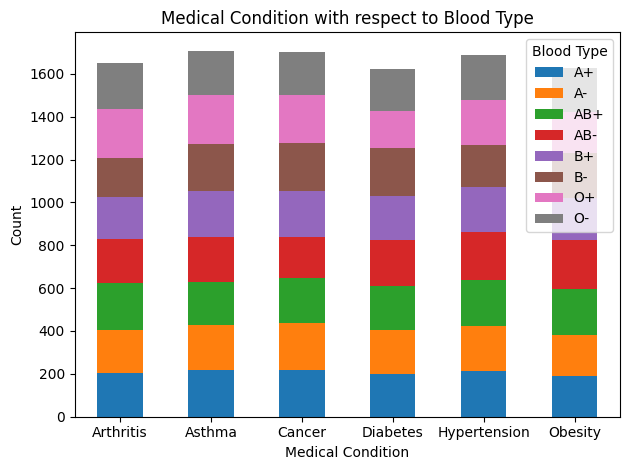

In [65]:
#count of medical condition with respect to blood groups
medical_condition_blood_type = pd.crosstab(df['Medical Condition'], df['Blood Type'])
medical_condition_blood_type.plot(kind='bar', stacked=True)
plt.title('Medical Condition with respect to Blood Type')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

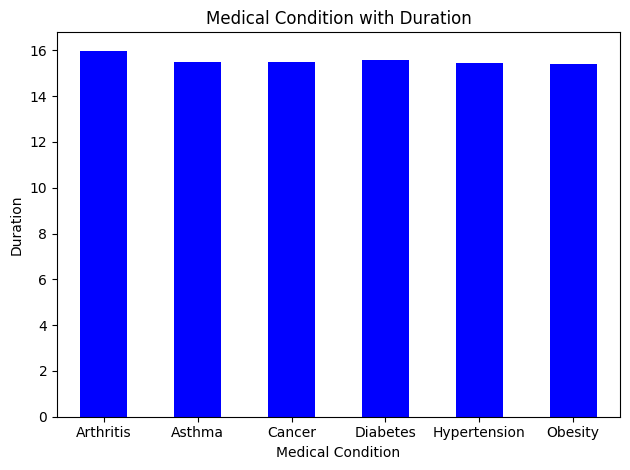

In [70]:
#medical condition with duration
medical_condition_duration = df.groupby('Medical Condition')['Duration'].mean()
medical_condition_duration.plot(kind='bar', color='blue')
plt.xlabel('Medical Condition')
plt.ylabel('Duration')
plt.title('Medical Condition with Duration')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


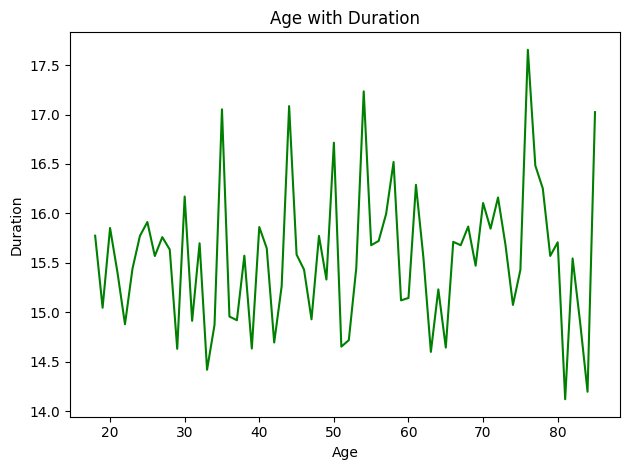

In [71]:
#line graph to show trend of how duration varies with age
age_duration = df.groupby('Age')['Duration'].mean()
age_duration.plot(kind='line', color='green')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.title('Age with Duration')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


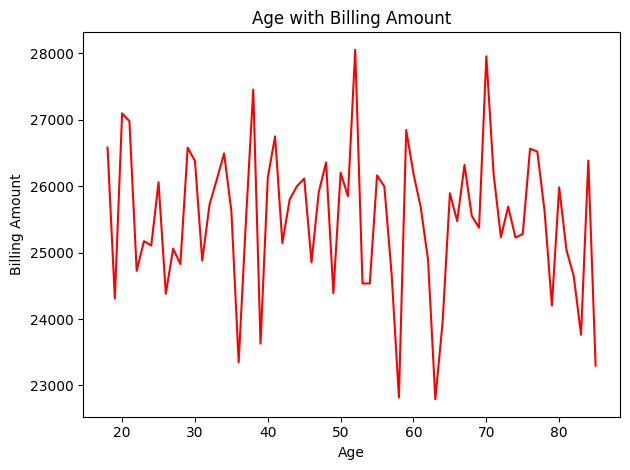

In [72]:
#billing amount with age and duration
age_billing_amount = df.groupby('Age')['Billing Amount'].mean()
age_billing_amount.plot(kind='line', color='red')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.title('Age with Billing Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

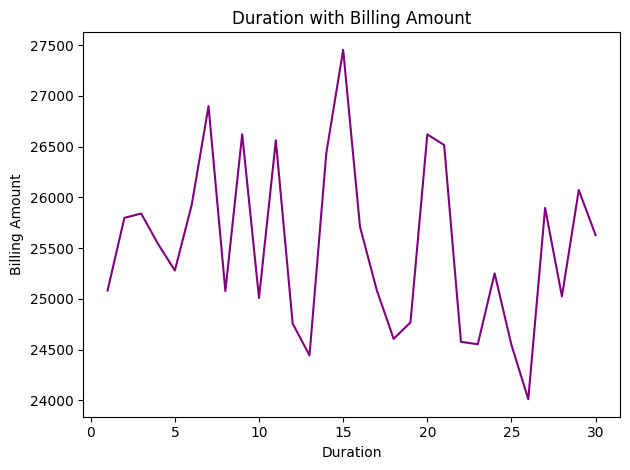

In [73]:
#Duration with billing amount
duration_billing_amount = df.groupby('Duration')['Billing Amount'].mean()
duration_billing_amount.plot(kind='line', color='purple')
plt.xlabel('Duration')
plt.ylabel('Billing Amount')
plt.title('Duration with Billing Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Correlation between Age and each medical condition:
Asthma         -0.000154
Cancer          0.003041
Hypertension   -0.016441
Arthritis       0.001786
Obesity         0.004091
Diabetes        0.007865
Name: Age, dtype: float64


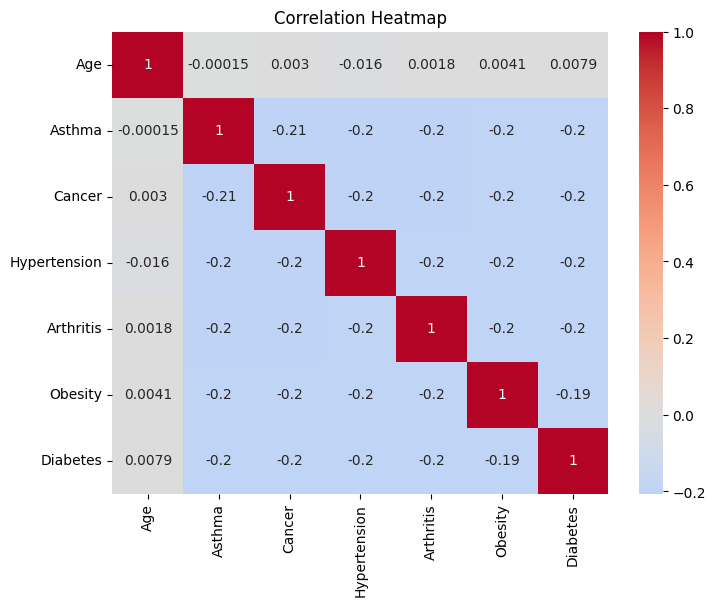

In [76]:
#Positive correlation shows that the variables are directly related to each other.
#negative correlation shows that the variables are inversely related to each other.


# Perform one-hot encoding for the 'Medical Condition' column
medical_conditions_encoded = pd.get_dummies(df['Medical Condition'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, medical_conditions_encoded], axis=1)

# Calculate the correlation between 'Age' and each medical condition
correlation_with_age = df_encoded[['Age', 'Asthma', 'Cancer', 'Hypertension', 'Arthritis', 'Obesity', 'Diabetes']].corr()

# Extract the correlation between 'Age' and each medical condition
correlation_with_age = correlation_with_age['Age'][1:]

# Print the correlation coefficients
print("Correlation between Age and each medical condition:")
print(correlation_with_age)




# Calculate the correlation matrix
correlation_matrix = df_encoded[['Age', 'Asthma', 'Cancer', 'Hypertension', 'Arthritis', 'Obesity', 'Diabetes']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()





In [84]:
#Drop Doctor
#df = df.drop(['Doctor'], axis=1)

#Drop Hospital 
df = df.drop(['Hospital'], axis=1)

#drop admisson date
df = df.drop(['Date of Admission'], axis=1)

#drop discharge date
df = df.drop(['Discharge Date'], axis=1)




In [87]:
#drop inssurance provider
df = df.drop(['Insurance Provider'], axis=1)

In [89]:
#drop name
df = df.drop(['Name'], axis=1)

In [90]:
#first 10 rows
df.head(10)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration
0,81,Female,O-,Diabetes,37490.983364,146,0,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,47304.064845,404,1,Lipitor,Normal,14
2,61,Male,B-,Obesity,36874.896997,292,1,Lipitor,Normal,30
3,49,Male,B-,Asthma,23303.322092,480,2,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,18086.344184,477,2,Paracetamol,Normal,24
5,41,Male,AB+,Arthritis,22522.363385,180,2,Aspirin,Abnormal,3
6,82,Male,AB+,Hypertension,39593.435761,161,2,Lipitor,Abnormal,24
7,55,Female,O-,Arthritis,13546.817249,384,0,Aspirin,Normal,17
8,33,Male,A+,Diabetes,24903.037270,215,0,Aspirin,Abnormal,5
9,39,Female,O-,Asthma,22788.236026,310,2,Aspirin,Normal,1


In [91]:


# Perform one-hot encoding for the 'Gender' feature
gender_encoded = pd.get_dummies(df['Gender'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, gender_encoded], axis=1)

# Drop the original 'Gender' column
df_encoded = df_encoded.drop('Gender', axis=1)

# Print the encoded DataFrame
print(df_encoded)



      Age Blood Type Medical Condition  Billing Amount  Room Number  \
0      81         O-          Diabetes    37490.983364          146   
1      35         O+            Asthma    47304.064845          404   
2      61         B-           Obesity    36874.896997          292   
3      49         B-            Asthma    23303.322092          480   
4      51         O-         Arthritis    18086.344184          477   
...   ...        ...               ...             ...          ...   
9995   83         A+           Obesity    39606.840083          110   
9996   47        AB+         Arthritis     5995.717488          244   
9997   54         B-         Arthritis    49559.202905          312   
9998   84         A+         Arthritis    25236.344761          420   
9999   20         B-         Arthritis    37223.965865          290   

      Admission Type   Medication  Test Results  Duration  Female   Male  
0                  0      Aspirin  Inconclusive        14    True  False

In [93]:
#encode gender as 1 or 0 male as 1 female as 0
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

df.head(10)


,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration
0,81,0,O-,Diabetes,37490.983364,146,0,Aspirin,Inconclusive,14
1,35,1,O+,Asthma,47304.064845,404,1,Lipitor,Normal,14
2,61,1,B-,Obesity,36874.896997,292,1,Lipitor,Normal,30
3,49,1,B-,Asthma,23303.322092,480,2,Penicillin,Abnormal,1
4,51,1,O-,Arthritis,18086.344184,477,2,Paracetamol,Normal,24
5,41,1,AB+,Arthritis,22522.363385,180,2,Aspirin,Abnormal,3
6,82,1,AB+,Hypertension,39593.435761,161,2,Lipitor,Abnormal,24
7,55,0,O-,Arthritis,13546.817249,384,0,Aspirin,Normal,17
8,33,1,A+,Diabetes,24903.037270,215,0,Aspirin,Abnormal,5
9,39,0,O-,Asthma,22788.236026,310,2,Aspirin,Normal,1


In [96]:
#encode bloodtype 
labelencoder = LabelEncoder()
df['Blood Type'] = labelencoder.fit_transform(df['Blood Type'])
df.head(30)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration
0,81,0,7,Diabetes,37490.983364,146,0,Aspirin,Inconclusive,14
1,35,1,6,Asthma,47304.064845,404,1,Lipitor,Normal,14
2,61,1,5,Obesity,36874.896997,292,1,Lipitor,Normal,30
3,49,1,5,Asthma,23303.322092,480,2,Penicillin,Abnormal,1
4,51,1,7,Arthritis,18086.344184,477,2,Paracetamol,Normal,24
5,41,1,2,Arthritis,22522.363385,180,2,Aspirin,Abnormal,3
6,82,1,2,Hypertension,39593.435761,161,2,Lipitor,Abnormal,24
7,55,0,7,Arthritis,13546.817249,384,0,Aspirin,Normal,17
8,33,1,0,Diabetes,24903.037270,215,0,Aspirin,Abnormal,5
9,39,0,7,Asthma,22788.236026,310,2,Aspirin,Normal,1


In [98]:
#encode medical condiiton as well
labelencoder = LabelEncoder()
df['Medical Condition'] = labelencoder.fit_transform(df['Medical Condition'])
df.head(30)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration
0,81,0,7,3,37490.983364,146,0,Aspirin,Inconclusive,14
1,35,1,6,1,47304.064845,404,1,Lipitor,Normal,14
2,61,1,5,5,36874.896997,292,1,Lipitor,Normal,30
3,49,1,5,1,23303.322092,480,2,Penicillin,Abnormal,1
4,51,1,7,0,18086.344184,477,2,Paracetamol,Normal,24
5,41,1,2,0,22522.363385,180,2,Aspirin,Abnormal,3
6,82,1,2,4,39593.435761,161,2,Lipitor,Abnormal,24
7,55,0,7,0,13546.817249,384,0,Aspirin,Normal,17
8,33,1,0,3,24903.037270,215,0,Aspirin,Abnormal,5
9,39,0,7,1,22788.236026,310,2,Aspirin,Normal,1


In [100]:
#medication uniqueu count
df['Medication'].nunique()

#encode medication
labelencoder = LabelEncoder()
df['Medication'] = labelencoder.fit_transform(df['Medication'])
df.head(30)

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Duration
0,81,0,7,3,37490.983364,146,0,0,Inconclusive,14
1,35,1,6,1,47304.064845,404,1,2,Normal,14
2,61,1,5,5,36874.896997,292,1,2,Normal,30
3,49,1,5,1,23303.322092,480,2,4,Abnormal,1
4,51,1,7,0,18086.344184,477,2,3,Normal,24
5,41,1,2,0,22522.363385,180,2,0,Abnormal,3
6,82,1,2,4,39593.435761,161,2,2,Abnormal,24
7,55,0,7,0,13546.817249,384,0,0,Normal,17
8,33,1,0,3,24903.037270,215,0,0,Abnormal,5
9,39,0,7,1,22788.236026,310,2,0,Normal,1


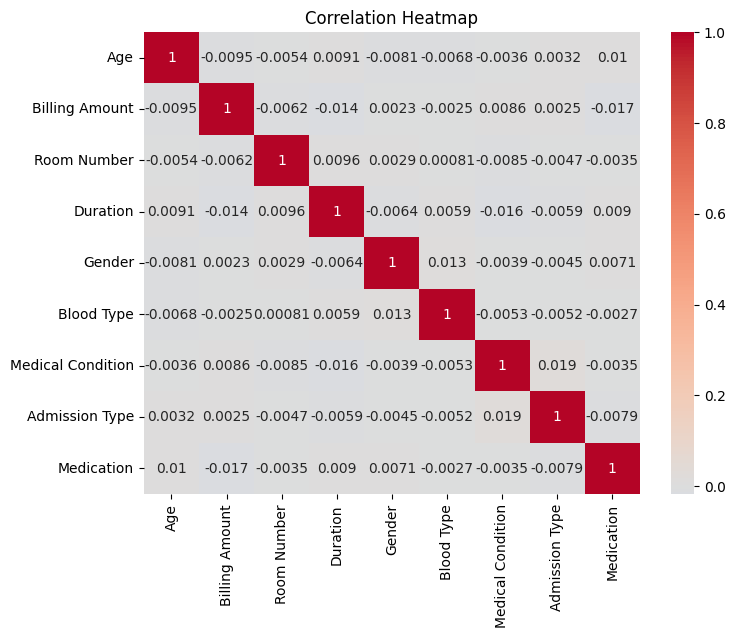

In [102]:
# Select the columns for the correlation matrix
columns = ['Age', 'Billing Amount', 'Room Number', 'Duration', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [103]:
# Create cross-tabulation between 'Admission Type' and 'Gender'
admission_gender_cross = pd.crosstab(index=df['Admission Type'], columns=df['Gender'])

bins = [0, 18, 30, 50, 70, 100]  
labels = ['0-17', '18-29', '30-49', '50-69', '70+']  
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)  
admission_age_cross = pd.crosstab(index=df['Admission Type'], columns=df['Age Group'])

print("Cross-tabulation between Admission Type and Gender:")
print(admission_gender_cross)
print("\nCross-tabulation between Admission Type and Age Group:")
print(admission_age_cross)

Cross-tabulation between Admission Type and Gender:
Gender             0     1
Admission Type            
0               1640  1602
1               1701  1666
2               1734  1657

Cross-tabulation between Admission Type and Age Group:
Age Group       0-17  18-29  30-49  50-69  70+
Admission Type                                
0                 52    573    934    985  698
1                 63    577    974   1000  753
2                 49    589    985   1006  762


In [104]:
# Create cross-tabulation between 'Medical Condition' and 'Gender'
medical_condition_gender_cross = pd.crosstab(index=df['Medical Condition'], columns=df['Gender'])

# Print cross-tabulation results
print("Cross-tabulation between Medical Condition and Gender:")
print(medical_condition_gender_cross)

Cross-tabulation between Medical Condition and Gender:
Gender               0    1
Medical Condition          
0                  815  835
1                  874  834
2                  887  816
3                  825  798
4                  836  852
5                  838  790


In [105]:
# Define age group bins and labels
bins = [18, 30, 50, 70, 100]  
labels = ['18-29', '30-49', '50-69', '70+']  
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)  

medical_condition_age_cross = pd.crosstab(index=df['Medical Condition'], columns=df['Age Group'], normalize='index')

print("Percentage of each medical condition within different age groups:")
print(medical_condition_age_cross * 100)

Percentage of each medical condition within different age groups:
Age Group              18-29      30-49      50-69        70+
Medical Condition                                            
0                  16.769420  30.332922  30.456227  22.441430
1                  17.608566  29.684711  30.696014  22.010708
2                  17.253731  29.313433  30.388060  23.044776
3                  17.459324  28.535670  30.788486  23.216521
4                  18.791541  30.271903  28.882175  22.054381
5                  18.193146  28.286604  31.277259  22.242991


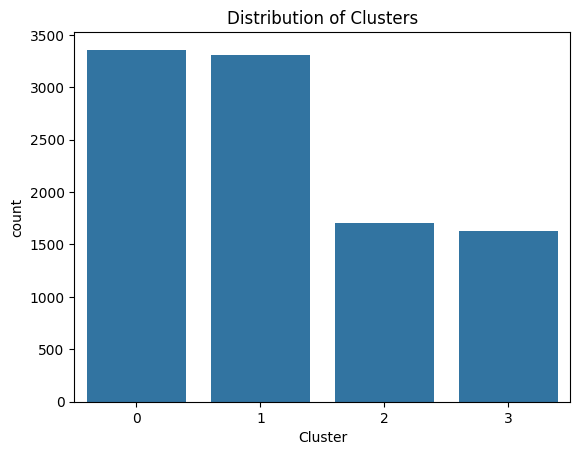

Cluster 0: [1 0]
Cluster 1: [3 4]
Cluster 2: [2]
Cluster 3: [5]


In [106]:
medical_conditions = df['Medical Condition']

# Encode medical conditions to numerical values
label_encoder = LabelEncoder()
medical_conditions_encoded = label_encoder.fit_transform(medical_conditions)

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=50)
cluster_labels = cluster.fit_predict(medical_conditions_encoded.reshape(-1, 1))

# Add cluster labels back to DataFrame
df['Cluster'] = cluster_labels

# Visualize the clusters
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.show()

# Print the clusters and their associated medical conditions
clustered_conditions = df.groupby('Cluster')['Medical Condition'].unique()
for cluster, conditions in clustered_conditions.items():
    print(f'Cluster {cluster}: {conditions}')


In [109]:

#drop room number
df = df.drop(['Room Number'], axis=1)


KeyError: "['Room Number'] not found in axis"

In [111]:


#drop billing amount
df = df.drop(['Billing Amount'], axis=1)

In [113]:
#drop age group
df = df.drop(['Age Group'], axis=1)

#drop cluster
df = df.drop(['Cluster'], axis=1)


In [114]:
df.head(20)

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Duration
0,81,0,7,3,0,0,Inconclusive,14
1,35,1,6,1,1,2,Normal,14
2,61,1,5,5,1,2,Normal,30
3,49,1,5,1,2,4,Abnormal,1
4,51,1,7,0,2,3,Normal,24
5,41,1,2,0,2,0,Abnormal,3
6,82,1,2,4,2,2,Abnormal,24
7,55,0,7,0,0,0,Normal,17
8,33,1,0,3,0,0,Abnormal,5
9,39,0,7,1,2,0,Normal,1


In [125]:
# Split the data into features and target variable
X = df.drop(['Test Results'], axis=1)
y = df['Test Results']

# Label encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

#Accuracy 
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Mean Squared Error: 0.6725949632095456
Mean Absolute Error: 0.6804704794421105
Root Mean Squared Error: 0.8201188713897185
Accuracy: -0.001015123138632834


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [126]:
#Apply SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = svc.score(X_test, y_test)    
print("Accuracy:", accuracy)


Accuracy: 0.3406666666666667


In [128]:

#apply xgboost
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.3426666666666667


In [129]:
#apply random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.33
